In [1]:
import numpy as np
import matplotlib.pyplot as plt


import keras
from keras import layers
from keras import models


%matplotlib inline

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2234400878893828447
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1417448652
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1341925078269501802
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

In [4]:
from keras import optimizers

# Let's use slower learning rate than by default
# https://keras.io/optimizers/

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset2/train"
validation_dir = "dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),

    # We read images in batches
    batch_size=16,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [6]:


# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break



data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)


In [7]:
# Check the last labels batch
labels_batch

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [8]:

# Our first trial is to read only 10 batches per epoch (10x16 = 160 images per epoch)
# and run only 5 epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 10,
      verbose = 1,
      epochs = 5,
      validation_data = validation_generator,
      validation_steps = 10)

# Save the model
model.save('case_2_run_1.h5')

Epoch 1/5
10/10 [==============================] - 21s 2s/step - loss: 0.6135 - acc: 0.6375 - val_loss: 0.5716 - val_acc: 0.7000
Epoch 2/5
10/10 [==============================] - 26s 3s/step - loss: 0.5897 - acc: 0.6688 - val_loss: 0.5463 - val_acc: 0.6937
Epoch 3/5
10/10 [==============================] - 23s 2s/step - loss: 0.5831 - acc: 0.6625 - val_loss: 0.5066 - val_acc: 0.7688
Epoch 4/5
10/10 [==============================] - 22s 2s/step - loss: 0.5377 - acc: 0.7438 - val_loss: 0.5313 - val_acc: 0.7095
Epoch 5/5
10/10 [==============================] - 23s 2s/step - loss: 0.4032 - acc: 0.8125 - val_loss: 0.4976 - val_acc: 0.7250


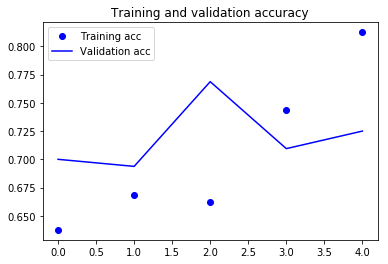

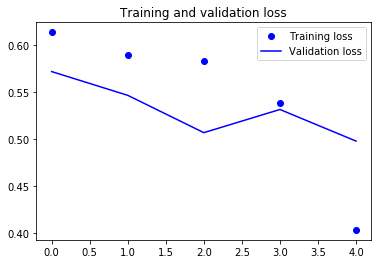

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Best guess calculation
# No_symptoms / (No_symptoms + Symptoms)
print('Best guess accuracy: {:.4f}'.format(1031/(1031+516)))

Best guess accuracy: 0.6665
